<a href="https://colab.research.google.com/github/les2000les/taba/blob/main/230425_TABA_cnn%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

from torch import nn

In [ ]:
#gpu 되는지 확인
torch.cuda.is_available() #시스템에서 cuda지원해서 pytorch 사용 가능능

True

In [ ]:
device = torch.device("cuda")

In [ ]:
#dataset 다운로드드
train_dataset = MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(), download = True) #가져올 때 totensor() 적용
test_dataset = MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True) #가져올 때 totensor() 적용

In [ ]:
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
#dataloader 생성

train_loader  = DataLoader(dataset = train_dataset, batch_size = 128, shuffle = True)
test_loader  = DataLoader(dataset = test_dataset, batch_size = 128, shuffle = True)
# 데이터를 꺼내오는 로더를 선언하는데 한 번에 128개의 이미지를 꺼내고, 셔플을 통해 랜덤으로 가져옴옴

##Tensor

In [ ]:
# totensor: tensor로 변환
# tensor는 파이토치 기준으로 텐서로 변환시켜야 연산 가능
# aaa = [0, 0, 0]
# numpy로 만들었을 때 연산 불가 텐서로 변환 필요

In [ ]:
#Numpy > Tensor

z = torch.empty(5,2)
print(z)
print(z.shape)

tensor([[ 1.3452e-43,  0.0000e+00],
        [ 9.1084e-44,  0.0000e+00],
        [ 2.7354e-33,  0.0000e+00],
        [-2.7487e-34,  0.0000e+00],
        [ 4.4842e-44,  0.0000e+00]])
torch.Size([5, 2])


In [ ]:
a = np.ones([5,2])
print(a)
print(a.shape)


#tensor로 변환
b = torch.from_numpy(a)
print(b, b.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
(5, 2)
tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64) torch.Size([5, 2])


In [ ]:
#tensor > numpy

numpy_arr = b.numpy()
print(numpy_arr)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


##MNIST 데이터셋을 확인

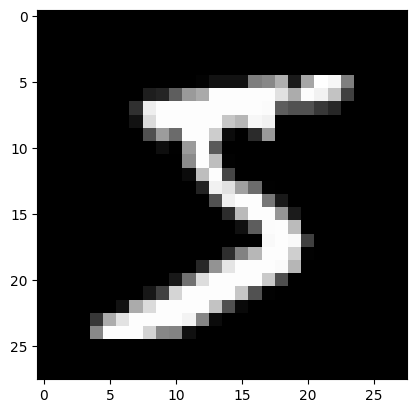

In [ ]:
img = train_dataset[0][0].numpy()
plt.imshow(img[0], cmap ='gray')

##모델만들기(multi layer perceptron)

In [ ]:
#sequential
mnist_fc_model = nn.Sequential(
    nn.Flatten(), #한 줄로 펴줌
    nn.Linear(in_features = 28*28*1, out_features = 256),
    nn.Sigmoid(), #활성화 함수
    nn.Linear(in_features = 256, out_features = 10),
    #in_feature를 잘 맞춰줘야함
    nn.Softmax() #총합이 1이 되도록 해주는 기능
)

In [ ]:
# device = "cuda"
# 모델을 device로 전달해야 함
# cpu에 만들어지까 gpu로 넘겨서 연산을 하도록 해야함
mnist_fc_model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=256, out_features=10, bias=True)
  (4): Softmax(dim=None)
)

In [ ]:
from torch import optim
import time
def train(model, train_loader):
  epochs = 10 # 데이터를 보는 횟수
  optimizer = optim.Adam(model.parameters(), lr = 0.0001)
  criterion = nn.CrossEntropyLoss() #클래스분류에서 자주 사용하는 loss



  start_time = time.time() #시작시간 체크


  for epoch in range(epochs):
    #model 학습이 가능하도록 모드를 변경
    model.train()
    print(f"epochs: {str(epoch+1)} / {str(epochs)}")

    for samples in train_loader:  #trainloader에서 128개씩 던져줌
       x_t, y_t = samples
       x_t, y_t = x_t.to(device), y_t.to(device) #데이터를 gpu로 보냄
       pred = model(x_t) #predict
       loss = criterion(pred, y_t) #loss 구하기
       #optimizer을 사용해서 학습을 시킴
       optimizer.zero_grad() #gradient가 0이 되도록 초기화
       #역전파
       loss.backward() #기울기(gradient) 구하기
       optimizer.step() #기울기 적용

    ##학습은 여기까지
    #하나의 epoch에 대해 학습이 끝난 후 train에 대한 정확도 test 
    
    #모델을 평가상태로 모드 변경
    model.eval()
    correct = 0
    for sample in train_loader:
      xx,yy = samples
      xx, yy = xx.to(device), yy.to(device)
      pred = model(xx) # 모델 predict
      _, predicted = torch.max(pred, 1)
      correct += predicted.eq(yy.data).sum()
    print(f"train_accuracy: {(100*correct/len(train_loader.dataset)).item()}.")

    end_time = time.time() #끝나는 시간 확인

    지난시간 = end_time - start_time
    분 = int(지난시간 // 60)
    초 = int(지난시간 % 60)

    print(f"경과시간: {분}분 {초}초")

In [ ]:
train(mnist_fc_model, train_loader)

epochs: 1 / 10


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


KeyboardInterrupt: ignored

##우리가 만든 모델의 복잡도 알아보기

In [ ]:
#모델의 파라미터 수로 복잡도 판단
#훈련 가능한 parameter
#훈련 가능하지 않은 parameter

In [ ]:
def 복잡도계산(model):
  pp = 0
  # 모델에서 parameter를 하나씩 불러옴
  for p in list(model.parameters()):
    nn = 1
    # 각 parameter의 수를 더해줌
    for s in list(p.size()):
      nn = nn*s
    pp += nn
  return pp

In [ ]:
복잡도계산(mnist_fc_model)

#CNN을 이용해서 모델 설계

In [ ]:
# cnn 합성곱연산을 이용한 모델
# 이미지에서 많이 사용됨

In [ ]:
mnist_cnn_model = nn.Sequential(
    #input = 1*28*28
    nn.Conv2d(in_channels = 1, out_channels = 4, kernel_size = 3, stride = 1, padding = 0),
    nn.ReLU(),
    nn.Conv2d(in_channels = 4, out_channels = 8, kernel_size = 3, stride = 1, padding = 0),
    nn.ReLU(),

    # convolution layer 2개 완성
    nn.Flatten(), #한 줄로 펴줌
    nn.Linear(in_features = 24*24*8, out_features = 48),
    nn.Sigmoid(), #활성화 함수
    nn.Linear(in_features = 48, out_features = 10),
    #in_feature를 잘 맞춰줘야함
    nn.Softmax() #총합이 1이 되도록 해주는 기능
)

In [ ]:
복잡도계산(mnist_cnn_model)

In [ ]:
mnist_cnn_model.to(device)
train(mnist_cnn_model, train_loader)

#Le-Net

In [ ]:
#Le-Net이라는 검증된 네트워크를 만들거임

In [ ]:
import torch.nn.functional as F
lenet = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5, stride = 1),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size = 2),
    nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size = 2),
    nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 4, stride = 1),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(in_features = 120, out_features = 84),
    nn.Tanh(),
    nn.Linear(in_features = 84, out_features = 10),
    nn.Softmax()
)


In [ ]:
복잡도계산(lenet)

In [ ]:
lenet.to(device)
train(lenet, train_loader)

In [ ]:
from torchsummary import summary
summary(lenet, input_size = (1, 28, 28)) 

In [ ]:
summary(mnist_cnn_model, input_size = (1, 28, 28))

In [ ]:
model = nn.Sequential(
    nn.Conv2d(),
    nn.Flatten(),
    nn.Linear,
    
)

#복잡한 CNN

##FashionMNIST

In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms

In [ ]:
fashion_mnist_transforms = transforms.Compose([
    transforms.ToTensor(), #tensor 형태로 변환
    transforms.Resize(48) # 48x 48이미지로 변환
])


train_dataset = FashionMNIST('./', transform = fashion_mnist_transforms, train = True, download = True)
test_dataset = FashionMNIST('./', transform = fashion_mnist_transforms, train = False, download = True)



train_loader =  DataLoader(dataset = train_dataset,batch_size = 256, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 256, shuffle = True)

#모델만들기

In [ ]:
# 총 7개의 convolution layer가 존재하도록 만들 것

In [ ]:
from torch import nn
import torch
class SimpleConvNet1(nn.Module):
  def __init__(self):
    #초기화
    super().__init__() #부모 클래스 초기화
    #선언
    self.CNN = nn.Sequential(
        #stage1
        nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        
        
        #stage2
        nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),

        #stage3
        nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 'same'),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 4, stride = 4), #크기를 많이 줄이기 위해
        )
    
    self.FC = nn.Sequential(
      nn.Linear(64*3*3, 256),
      nn.ReLU(True),
      nn.Dropout(p = 0.2),
      nn.Linear(256, 10),
      nn.Softmax()
      )

  #forward
  def forward(self, inp) : 
    cnn_result = self.CNN(inp)
    flatten = torch.flatten(cnn_result, 1)
    fc_result = self.FC(flatten)
    return fc_result

In [ ]:
convnet1 = SimpleConvNet1()

In [ ]:
convnet1.to(device)
summary(convnet1,(1, 48, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
              ReLU-2           [-1, 16, 48, 48]               0
            Conv2d-3           [-1, 16, 48, 48]           2,320
              ReLU-4           [-1, 16, 48, 48]               0
         MaxPool2d-5           [-1, 16, 24, 24]               0
            Conv2d-6           [-1, 32, 24, 24]           4,640
              ReLU-7           [-1, 32, 24, 24]               0
            Conv2d-8           [-1, 32, 24, 24]           9,248
              ReLU-9           [-1, 32, 24, 24]               0
        MaxPool2d-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 12, 12]          18,496
             ReLU-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 12, 12]          36,928
             ReLU-14           [-1, 64,

In [ ]:
##print(train_dataset[0][0])
print(train_dataset[0][0].shape)

torch.Size([1, 48, 48])


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
train(convnet1, train_loader)

epochs: 1 / 10
train_accuracy: 26.633333206176758.
경과시간: 0분 32초
epochs: 2 / 10
train_accuracy: 27.808334350585938.
경과시간: 1분 8초
epochs: 3 / 10
train_accuracy: 29.766666412353516.
경과시간: 1분 45초
epochs: 4 / 10
train_accuracy: 30.55000114440918.
경과시간: 2분 28초
epochs: 5 / 10
train_accuracy: 28.200000762939453.
경과시간: 3분 4초
epochs: 6 / 10
train_accuracy: 30.941667556762695.
경과시간: 3분 47초
epochs: 7 / 10
train_accuracy: 28.983333587646484.
경과시간: 4분 20초
epochs: 8 / 10
train_accuracy: 29.375.
경과시간: 5분 0초
epochs: 9 / 10
train_accuracy: 28.59166717529297.
경과시간: 5분 58초
epochs: 10 / 10
train_accuracy: 29.766666412353516.
경과시간: 6분 35초


##test 하는 함수

In [ ]:
def test(model, loader):
  with torch.no_grad():
    #이 안에 있는 것들은 기울기 계산을 안함
    #모델이 고정됨. 평가하는 용도로 제격
    model.eval()
    correct = 0
    for xx, yy in loader:
      #xx 데이터(이미지),
      # yy 정답
      data,target = xx.to(device), yy.to(device)
      pred = model(data)
      _, predicted = torch.max(pred, 1)
      correct += predicted.eq(target.data).sum()

      

    print(f"test accuracy: {(100 * correct /len(loader.dataset)).item()}")

In [ ]:
test(convnet1, test_loader)

test accuracy: 83.04000091552734


#MNIST 훈련

#SVHN이라는 데이터셋 학습

In [ ]:
fashion_mnist_transforms = transforms.Compose([
    transforms.ToTensor(), #tensor 형태로 변환
    transforms.Resize(48) # 48x 48이미지로 변환
])

In [ ]:
train_dataset = MNIST(root = 'MNIST_data/', train = True, transform = fashion_mnist_transforms, download = True)
test_dataset = MNIST(root = 'MNIST_data/', train = False, transform = fashion_mnist_transforms, download = True)

In [ ]:


train_loader = DataLoader(dataset = train_dataset, batch_size = 256, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 256, shuffle = True)

In [ ]:
convnet2 = SimpleConvNet1()

In [ ]:
convnet2.to(device)
summary(convnet2, (1, 48, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
              ReLU-2           [-1, 16, 48, 48]               0
            Conv2d-3           [-1, 16, 48, 48]           2,320
              ReLU-4           [-1, 16, 48, 48]               0
         MaxPool2d-5           [-1, 16, 24, 24]               0
            Conv2d-6           [-1, 32, 24, 24]           4,640
              ReLU-7           [-1, 32, 24, 24]               0
            Conv2d-8           [-1, 32, 24, 24]           9,248
              ReLU-9           [-1, 32, 24, 24]               0
        MaxPool2d-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 12, 12]          18,496
             ReLU-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 12, 12]          36,928
             ReLU-14           [-1, 64,

In [ ]:
train(convnet2, train_loader)

epochs: 1 / 10
train_accuracy: 29.766666412353516.
경과시간: 0분 32초
epochs: 2 / 10
train_accuracy: 34.07500076293945.
경과시간: 1분 5초
epochs: 3 / 10
train_accuracy: 36.03333282470703.
경과시간: 1분 38초
epochs: 4 / 10
train_accuracy: 36.42499923706055.
경과시간: 2분 11초
epochs: 5 / 10
train_accuracy: 36.81666564941406.
경과시간: 2분 44초
epochs: 6 / 10
train_accuracy: 36.81666564941406.
경과시간: 3분 17초
epochs: 7 / 10
train_accuracy: 36.81666564941406.
경과시간: 3분 51초
epochs: 8 / 10
train_accuracy: 36.81666564941406.
경과시간: 4분 23초
epochs: 9 / 10
train_accuracy: 36.81666564941406.
경과시간: 4분 57초
epochs: 10 / 10
train_accuracy: 37.20833206176758.
경과시간: 5분 30초


In [ ]:
import torchvision.datasets as datasets

svhn_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(48),
    transforms.Grayscale(),

])


SVHN_train_dataset = datasets.SVHN(root = './', split='train', transform=svhn_transform, download = True)
SVHN_test_dataset = datasets.SVHN(root = './', split='test', transform=svhn_transform, download = True)

sv_train_loader = DataLoader(dataset=SVHN_train_dataset, batch_size = 128, shuffle  = True)
sv_test_loader = DataLoader(dataset=SVHN_test_dataset, batch_size = 128, shuffle  = True)

Using downloaded and verified file: ./train_32x32.mat
Using downloaded and verified file: ./test_32x32.mat


In [ ]:
SVHN_train_dataset[0][0].shape

torch.Size([1, 48, 48])

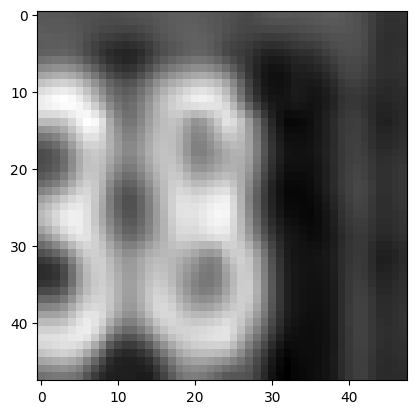

In [ ]:
plt.imshow(SVHN_train_dataset[170][0][0], cmap = 'gray')
plt.show()

In [ ]:
test(convnet2, sv_test_loader)

test accuracy: 12.40012264251709


##Transfer learning

In [ ]:
convnet2

SimpleConvNet1(
  (CNN): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, cei

In [ ]:
class SvhnNet(nn.Module):
  def __init__(self, pretrain_model):
    super().__init__()
    self.pretrain = pretrain_model # 학습된 모델을 self.pretrain에 저장
    #우리가 받은 pretrain_model의 parameter를 고정
    for param in self.pretrain.parameters():
      param.requires_grad = False


    self.add_model = nn.Sequential(
        nn.Linear(in_features = 64 *3 * 3, out_features = 256),
        nn.ReLU(True),
        nn.Dropout(p = 0.2),
        nn.Linear(in_features = 256, out_features = 10),
        nn.Softmax()
    )

  def forward(self, inp):
    with torch.no_grad():
      cnn_result = self.pretrain(inp)
    flatten = torch.flatten(cnn_result, 1)
    result = self.add_model(flatten)
    return result


In [ ]:
svhn_net = SvhnNet(convnet2.CNN)

In [ ]:
svhn_net.to(device)
summary(svhn_net, (1, 48,48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
              ReLU-2           [-1, 16, 48, 48]               0
            Conv2d-3           [-1, 16, 48, 48]           2,320
              ReLU-4           [-1, 16, 48, 48]               0
         MaxPool2d-5           [-1, 16, 24, 24]               0
            Conv2d-6           [-1, 32, 24, 24]           4,640
              ReLU-7           [-1, 32, 24, 24]               0
            Conv2d-8           [-1, 32, 24, 24]           9,248
              ReLU-9           [-1, 32, 24, 24]               0
        MaxPool2d-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 12, 12]          18,496
             ReLU-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 12, 12]          36,928
             ReLU-14           [-1, 64,

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
SVHN_train_dataset

Dataset SVHN
    Number of datapoints: 73257
    Root location: ./
    Split: train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=48, interpolation=bilinear, max_size=None, antialias=warn)
               Grayscale(num_output_channels=1)
           )

In [ ]:
#데이터셋에서 일부만 가져오기
from torch.utils.data import random_split

svhn_train_1, svhn_train_2 =random_split(SVHN_train_dataset, [100, 73157])
sv_train_loader_2 = DataLoader(dataset= svhn_train_1, batch_size = 128, shuffle = True)

In [ ]:
train(svhn_net, sv_train_loader)

epochs: 1 / 10
train_accuracy: 14.861377716064453.
경과시간: 1분 10초
epochs: 2 / 10
train_accuracy: 11.732666969299316.
경과시간: 2분 22초
epochs: 3 / 10
train_accuracy: 17.207910537719727.
경과시간: 3분 38초
epochs: 4 / 10
train_accuracy: 17.990089416503906.
경과시간: 4분 52초
epochs: 5 / 10
train_accuracy: 22.683156967163086.
경과시간: 6분 4초
epochs: 6 / 10
train_accuracy: 20.33662223815918.
경과시간: 7분 40초
epochs: 7 / 10


KeyboardInterrupt: ignored

#ResNet 18을 이용해서 매우 적은 숫자의 fashionMnist학습

In [ ]:
fashion_mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),

])


train_dataset = FashionMNIST(root = './', transform=fashion_mnist_transforms, train = True, download = True)
test_dataset = FashionMNIST(root = './', transform=fashion_mnist_transforms, train = False, download = True)


test_loader = DataLoader(dataset=test_dataset, batch_size = 128, shuffle  = True)

In [ ]:
# random_split

train_dataset1, train_dataset2 = random_split(train_dataset, [100, 59900])
train_loader2 = DataLoader(dataset = train_dataset1, batch_size = 128, shuffle = True)

#학습된 resNet18을 불러오자

In [ ]:
from torchvision import models
resnet18_pretrained = models.resnet18(pretrained = True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
##transfer learning을 진행하기 위해 할 것
# 1. 뒤쪽에 fc레이어를 변경
# 2. 앞쪽에 cnn부분의 학습을 멈춤(freeze)

In [ ]:
# freeze
for param in resnet18_pretrained.parameters():
  param.requires_grad = False
# 뒤쪽에 FC 레이어를 변경
resnet18_pretrained.fc = nn.Sequential(
    nn.Linear(512,10),
    nn.Softmax()
)
resnet18_pretrained.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(7,7),stride=(2,2),padding=(3,3),bias=False)
resnet18_pretrained.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
summary(resnet18_pretrained, (1,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,136
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
train(resnet18_pretrained, train_loader2)

epochs: 1 / 10
train_accuracy: 26.0.
경과시간: 0분 0초
epochs: 2 / 10
train_accuracy: 16.0.
경과시간: 0분 0초
epochs: 3 / 10
train_accuracy: 16.0.
경과시간: 0분 0초
epochs: 4 / 10
train_accuracy: 16.0.
경과시간: 0분 0초
epochs: 5 / 10
train_accuracy: 13.0.
경과시간: 0분 0초
epochs: 6 / 10
train_accuracy: 9.0.
경과시간: 0분 0초
epochs: 7 / 10
train_accuracy: 9.0.
경과시간: 0분 0초
epochs: 8 / 10
train_accuracy: 12.0.
경과시간: 0분 0초
epochs: 9 / 10
train_accuracy: 13.0.
경과시간: 0분 0초
epochs: 10 / 10
train_accuracy: 12.0.
경과시간: 0분 0초


#fine tuning

In [ ]:
resnet18_pretrained = models.resnet18(pretrained=True)
resnet18_pretrained.to(device)

# freeze
# for param in resnet18_pretrained.parameters():
#   param.requires_grad = False
# 뒤쪽에 FC 레이어를 변경
resnet18_pretrained.fc = nn.Sequential(
    nn.Linear(512,10),
    nn.Softmax()
)
resnet18_pretrained.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(7,7), stride=(2,2), padding=(3,3),bias=False)
resnet18_pretrained.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
test(resnet18_pretrained, test_loader)

test accuracy: 16.190000534057617


In [ ]:
summary(resnet18_pretrained, input_size=(1,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,136
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
